Ασκηση 6 - Γεννητρια BlumBlumShub

In [80]:
import random
import math
import gmpy2

Ορίζουμε ορισμένες συναρτήσεις που θα μας φανούν χρήσιμες αργότερα. 

In [81]:
#επαναλαμβανόμενος τετραγωνισμός
def fastmod(base , power , mod):
    result = 1
    while(power > 0):
        if(power%2 == 1):
            result = (result*base)%mod
            power = power -1
        power = power/2
        base  = (base*base)%mod
    return result%mod

#επιστρέφει τους διαιρέτες του n
def divisors(n):
    divisors = []
    large_divisors = []
    for i in range(2,int(math.sqrt(n)+1)):
        if n % i == 0 :
            divisors.append(i)
            if(i*i!=n):
                large_divisors.append(int(n/i))
    divisors.extend(large_divisors)  
    return divisors

#true αν ειναι σχετικά πρώτοι, false διαφορετικά
def coprime(a,b):
    if (math.gcd(a,b)==1):
        return True
    else:
        return False
    
#έλεγχος πρώτων αριθμών με το τεστ του fermat
def fermat_test(n,k):
    if n == 2:
        return True

    if n % 2 == 0:
        return False

    for i in range(k):
        a = random.randint(1,n-1)

        if fastmod (a , n-1, n) != 1:
            return False 
    return True

#true αν το p είναι Safe prime, false διαφορετικά
def safePrime(p):
    if (p>3 and p%4 == 3 and fermat_test(p,200) and fermat_test((p-1)/2,200)):
        return True 
    return False

#true αν το p είναι Safe Safe prime, false διαφορετικά
def safeSafePrime(p):
    if (safePrime(p) and safePrime((p-1)/2)):
            return True
    return False

def parity(n):
    parity = 0
    while n: 
        parity = (parity+1)
        parity = parity%2
        n = n & (n - 1) 
    return parity 



Ερώτημα α. 
Θα βρούμε το s και το Ν, σύμφωνα με τις 2 προυποθέσεις που ορίστηκαν στο ερώτημα 5α:
1. N τέτοιο, έτσι ωστε το 2 έχει τάξη λ(λ(Ν)) στην ομάδα λ(Ν)/2.
2. s τέτοιο, ώστε να έχει τάξη λ(Ν)/2 στην ομάδα Ν.



In [82]:
#βρίσκει εναν Safe Safe prime με μηκος σε bits που ορίζουμε 
def findSafeSafePrime(bits):
    a = random.getrandbits(bits)
    while (safeSafePrime(a) == 0):
        a = random.getrandbits(bits)
    return a

#υπολογισμός της λ(Ν) για τα δεδομένα του προβλήματος μας, οπου p,q SafeSafe primes
def lamda(p,q):
    p1 = (p-1)/2
    q1 = (q-1)/2
    return(int(2*p1*q1))

#το ίδιο για τη λ(λ(Ν))
def lamda_lamda(p,q):
    p1 = (p-1)/2
    q1 = (q-1)/2
    p2 = (p1-1)/2
    q2 = (q1-1)/2
    return(int(2*p2*q2))


#Condition1 για μέγιστη περίοδο 
def condition1(p,q):
    l_l = lamda_lamda(p,q)
    l =int( lamda(p,q)/2 )
    a = fastmod(2, l_l , l )
    if (a==1):
        for x in divisors(l_l):
            if (fastmod(2,x,l) == 1):
                return(False)
        return True

#επιστρέφει ένα s, σχετικά πρώτο με το Ν
def coprime_seed(p,q):
    s = random.randint(3,p*q)
    while (not (coprime(s,p) and coprime(s,q))):
        s = random.randint(3,p*q) 
    return s

#condition2 για μέγιστη περίοδο
def condition2(p,q,s):
    l = int(lamda(p,q)/2)
    a = fastmod(s,l,p*q)
    if (a==1):
        for x in divisors(l):
            if (fastmod(s,x,p*q) == 1):
                return False
        return True

#βρίσκει Ν, για το οποιο πληρείται το 1ο condition
def findN(bits):
    p = findSafeSafePrime(bits)
    q = findSafeSafePrime(bits)
    while condition1(p,q)==0 or p==q:
        p = findSafeSafePrime(bits)
        q = findSafeSafePrime(bits)
    return (p,q,p*q)

#επιστρέφει ενα s, έτσι ώστε να πληρείται το 2ο condition.
def findSeed(p,q):
    s = coprime_seed(p,q)
    while (not condition2(p,q,s)):
        s = coprime_seed(p,q)
    return s

#βρίσκει όλες τις αρχικές τιμές της γεννήτριας, p,q,s.
def create_generator(bits):
    p,q,N = findN(bits)
    s = findSeed(p,q)
    return p,q,s






In [36]:
p,q,s = create_generator(20)
print('p:',p)
print('q:',q)
print('N:' , p*q)
print('s:',s)

p: 57287
q: 1010567
N: 57892351729
s: 20898590198


Eρώτημα β: Πειραματική επαλήθευση της περιόδου.
Εδώ θα το τρέξουμε για λίγο μικρότερο αριθμό bits. 

In [15]:
def period(p,q,s):
    N = p*q
    period = lamda_lamda(p,q)
    s1=gmpy2.mpz(s)
    for i in range(1,period+1):
        s1 = fastmod(s1,2,N)
        if (s1 == s and i<period):
            print('μικρότερη περίοδος:' ,i)
            break
    print('s μετα απο λ(λ(Ν)) επαναλήψεις:', s1, 'οπότε η περίοδος είναι επιθυμητή:', i)

p,q,s = create_generator(14)
print('p:',p, 'q:', q, 's:', s)
print('H αναμενόμενη περίοδος είναι:', lamda_lamda(p,q))
period(p,q,s)



    
    
    



p: 7247 q: 7607 s: 8987648
H αναμενόμενη περίοδος είναι: 6885422
s μετα απο λ(λ(Ν)) επαναλήψεις: 8987648 οπότε η περίοδος είναι επιθυμητή: 6885422


Ερώτημα δ,ε. Πειραματική προσέγγιση του π. 

In [83]:
#implementation of blumblumshub generator, for fixed number of bits
def blum(p,q,s,bits, mode):
    result = 0 
    for x in range(bits):
        s = fastmod(s,2,p*q)
        if(mode==1):
            result =(result << 1) + s%2
        if (mode==2):
            result = (result << 1) + parity(s)
    state = s 
    return result,state 
        
def pi_approx(trials,mode):
    circle = 0 
    p,q,s = create_generator(20)
    for i in range(trials):
        a,s = blum(p,q,s,16,mode)
        x = a & 255 
        y = a >> 8 
        if ((x - 127.5)*(x - 127.5) + (y- 127.5)*(y- 127.5) <= 127.5*127.5) :
            circle += 1.0
    #print('Pi/4 is = 0.78539816339')    
    pi = (circle+1.0) / (trials+1.0) 
    #print('Our approximation is' , pi)
    return(pi)

In [84]:
print(pi_approx(1000,1))
print(pi_approx(1000,2))

0.7982017982017982
0.7832167832167832


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import time

In /home/aokidev/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aokidev/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aokidev/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/aokidev/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/aokidev/.local/lib/python3.6/site-packages/matplotlib/mpl-d

7.28406286239624


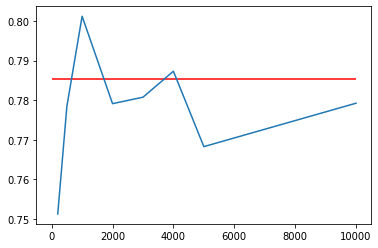

In [87]:
a = []
#trials = np.logspace(3,4,20, endpoint=True)
trials = [200,500,1000,2000,3000,4000,5000,10000]
start_time = time.time()

for i in trials:
    a.append(pi_approx(i,1))

print(time.time()-start_time)
plt.plot(trials,a)
plt.hlines(y=math.pi/4,xmin=0,xmax = 10000, colors='red', linestyles='solid', label='pi/4')
plt.show()


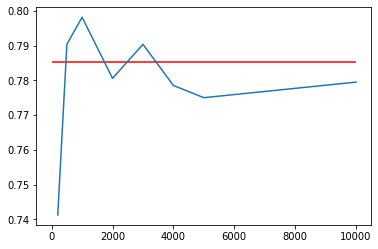

In [86]:
a = []
#trials = np.logspace(3,4,20, endpoint=True)
trials = [200,500,1000,2000,3000,4000,5000,10000]
start_time = time.time()

for i in trials:
    a.append(pi_approx(i,2))
plt.plot(trials,a)
plt.hlines(y=math.pi/4,xmin=0,xmax = 10000, colors='red', linestyles='solid', label='pi/4')
plt.show()